1. Load the Libraries

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay                   
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


2. Load the pre-processed files 

In [2]:
# Load preprocessed train and test csv
train_df = pd.read_csv('post-processed_train.csv')
test_df = pd.read_csv('post-processed_test.csv')

3. Data Preparation for Machine Learning

In [3]:
#For the training data
# All columns as features except for the last column, and Income-per-year_encoded as target
X_train = train_df.iloc[:, :-1].values  # All columns as features except for the last column
y_train = train_df['income-per-year_encoded'].values # Income-per-year_encoded as target

In [4]:
#For the test data
# All columns as features except for the last column, and Income-per-year_encoded as target
X_test = test_df.iloc[:, :-1].values  
y_test = test_df['income-per-year_encoded']  

4. Start of the Random Forest Classifier (Before making any hyper-parameters tuning)

In [5]:
#Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=400, random_state=42)

In [6]:
#Record the start time
start_time = time.time()

# Train the Model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_before_tuning = rf.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_before_tuning)
print(f"Accuracy before tuning: {accuracy * 100:.2f}%")

# Stop the timer after training
end_time = time.time()

print("Training Time for RandomForest (Before Tuning) is", (end_time-start_time), "seconds")


Accuracy before tuning: 84.06%
Training Time for RandomForest (Before Tuning) is 10.259594678878784 seconds


In [7]:
# Display classification report for detailed metrics
print("\nClassification Report before tuning:")
print(classification_report(y_test, y_pred_before_tuning))


Classification Report before tuning:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11360
           1       0.70      0.61      0.65      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.76      0.78     15060
weighted avg       0.84      0.84      0.84     15060



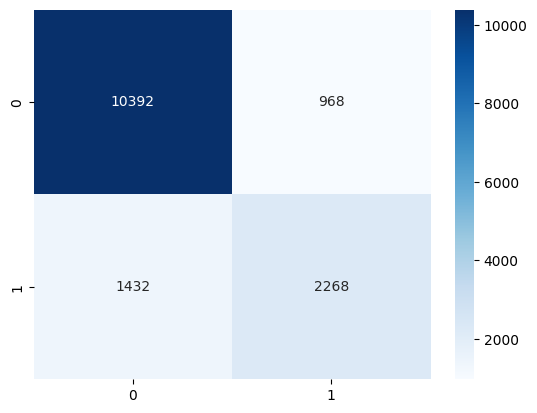

Confusion Matrix:
[[10392   968]
 [ 1432  2268]]


In [8]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Use Seaborn heatmap to visualize the matrix and display more than 4 digits
sns.heatmap(cm, annot=True, fmt='.6g', cmap="Blues")


# Show the plot
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

5. Setup Grid Search for hyper parameter tuning

In [9]:
start_time = time.time()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100 ], # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Maximum features of the tree
    'max_depth': [10, 50, 100, None], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Stop the timer after training
end_time = time.time()

print("Training Time for RandomForest (Search for Best Parameters) is: ", (end_time-start_time), "seconds")

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Set Score:", test_score) 


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Training Time for RandomForest (Search for Best Parameters) is:  616.4617576599121 seconds
Test Set Score: 0.8598937583001328


In [10]:
# Train the RandomForest with the best hyperparameters
best_rf = grid_search.best_estimator_ 
y_pred_after_tuning = best_rf.predict(X_test)

In [11]:
# Print classification report (After Tuning)
print("\nClassification Report (After Tuning):\n")
print(classification_report(y_test, y_pred_after_tuning))


Classification Report (After Tuning):

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.78      0.60      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.77      0.79     15060
weighted avg       0.85      0.86      0.85     15060

